In [37]:
import numpy as np
import pandas as pd

In [38]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GlobalAveragePooling1D, Lambda, Bidirectional
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop
from keras import backend as K

In [39]:
import keras 
keras.__version__

'2.2.2'

In [40]:
q1_data = np.load(open('q1_train.npy', 'rb'))
q2_data = np.load(open('q2_train.npy', 'rb'))

labels = np.load(open('label_train.npy', 'rb'))
embedding_matrix = np.load(open('word_embedding_matrix.npy', 'rb'))

In [41]:
from sklearn.cross_validation import train_test_split

X = np.stack((q1_data, q2_data), axis=1)
target = labels

X_train, X_val, y_train, y_val = train_test_split(X, target, test_size=0.25, random_state=126, stratify=target)
Q1_train = X_train[:,0]
Q2_train = X_train[:,1]
Q1_val = X_val[:,0]
Q2_val = X_val[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
def vec_distance(vects):
    x, y = vects
    return K.sum(K.square(x - y), axis=1, keepdims=True)

In [43]:
def vec_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [44]:
from keras.layers.embeddings import Embedding

nb_words = 137043
max_sentence_len=25
embedding_layer = Embedding(nb_words, 300, weights=[embedding_matrix], input_length=max_sentence_len, trainable=False)

In [45]:
lstm_layer =LSTM(128)

sequence_1_input = Input(shape=(max_sentence_len,), dtype='int32')
embedded_sequences_1 = embedding_layer(sequence_1_input)
x1 = lstm_layer(embedded_sequences_1)

sequence_2_input = Input(shape=(max_sentence_len,), dtype='int32')
embedded_sequences_2 = embedding_layer(sequence_2_input)
y1 = lstm_layer(embedded_sequences_2)

distance=Lambda(vec_distance, output_shape=vec_output_shape)([x1, y1])
dense1=Dense(16, activation='sigmoid')(distance)
dense1 = Dropout(0.3)(dense1)

bn2 = BatchNormalization()(dense1)
prediction=Dense(1, activation='sigmoid')(bn2)

model = Model(inputs=[sequence_1_input, sequence_2_input], outputs=prediction)

In [46]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 300)      41112900    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          219648      embedding_1[0][0]                
          

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [48]:
early_stopping =EarlyStopping(monitor='val_loss', patience=3)

In [49]:
hist=model.fit([Q1_train, Q2_train], y_train, validation_data=([Q1_val, Q2_val], y_val), verbose=1, epochs=10, batch_size=256, shuffle=False, class_weight=None, callbacks=[early_stopping])

Train on 303217 samples, validate on 101073 samples
Epoch 1/10
303217/303217 [==============================] - 256s 844us/step - loss: 0.5225 - acc: 0.7425 - val_loss: 0.4280 - val_acc: 0.8023
Epoch 2/10
303217/303217 [==============================] - 254s 837us/step - loss: 0.4218 - acc: 0.8079 - val_loss: 0.3941 - val_acc: 0.8217
Epoch 3/10
303217/303217 [==============================] - 255s 840us/step - loss: 0.3811 - acc: 0.8338 - val_loss: 0.3804 - val_acc: 0.8296
Epoch 4/10
303217/303217 [==============================] - 252s 833us/step - loss: 0.3515 - acc: 0.8504 - val_loss: 0.3779 - val_acc: 0.8332
Epoch 5/10
303217/303217 [==============================] - 253s 833us/step - loss: 0.3270 - acc: 0.8628 - val_loss: 0.3861 - val_acc: 0.8366
Epoch 6/10
303217/303217 [==============================] - 252s 832us/step - loss: 0.3053 - acc: 0.8738 - val_loss: 0.3963 - val_acc: 0.8390
Epoch 7/10
303217/303217 [==============================] - 252s 833us/step - loss: 0.2874 - acc

In [50]:
model.save('my_model.h5')

In [51]:
#RUN THIS EVERYTIME

from keras.models import load_model
model = load_model('my_model.h5')

In [52]:
test1_data = np.load(open('test1.npy', 'rb')) 
test2_data = np.load(open('test2.npy', 'rb'))
prediction = model.predict([test1_data, test2_data], verbose=1)

3563475/3563475 [==============================] - 5090s 1ms/step


In [53]:
rounded_prediction = [round(x[0]) for x in prediction]

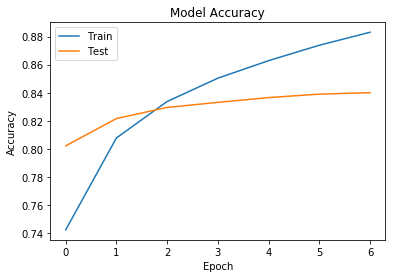

In [56]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

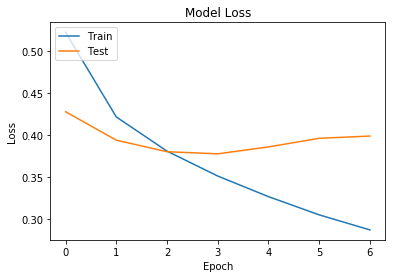

In [57]:
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Loss.png')
plt.show()

In [58]:
%store -r word_index

In [59]:
%store -r q1_data

In [60]:
%store -r q2_data 

In [61]:
from keras.preprocessing.text import Tokenizer

In [115]:
q1 = input("Enter question 1:")

Enter question 1:What can make Physics easy to learn?


In [116]:
q2 = input("Enter question 2:")

Enter question 2:How to learn Physics easily?


In [117]:
str(q1)

'What can make Physics easy to learn?'

In [118]:
str(q2)

'How to learn Physics easily?'

In [119]:
q1 = q1.lower()
q1 = str.replace(q1, '?', '')
q1 = [word_index[word] for word in q1.split()]

In [120]:
q1

[2, 13, 54, 471, 576, 8, 71]

In [121]:
q2 = q2.lower()
q2 = str.replace(q2, '?', '')
q2 = [word_index[word] for word in q2.split()]

In [122]:
from keras.preprocessing.sequence import pad_sequences
q1 = pad_sequences([q1], maxlen=25, padding='post')
q2 = pad_sequences([q2], maxlen=25, padding='post')

In [123]:
q1

array([[  2,  13,  54, 471, 576,   8,  71,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [124]:
q2

array([[  4,   8,  71, 471, 619,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [125]:
val = model.predict([q1, q2], verbose=1)

1/1 [==============================] - 0s 16ms/step


In [126]:
val[0][0]

0.8994425

In [127]:
result = 'Similar' if int(round(val[0][0])) == 1 else 'Not Similar'
result

'Similar'